In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
files.upload()

Saving Pencemaran_udara.xlsx to Pencemaran_udara (3).xlsx


{'Pencemaran_udara.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [ ]:
df=pd.read_excel('Pencemaran_udara.xlsx')
print (df)

    No  pm10  so2  co   o3  no2
0    1    38   36  25   46    9
1    2    45   36  39  102    8
2    3    51   37  27   63   10
3    4    51   38  19   85   10
4    5    52   39  25   62    9
5    6    62   37  39   64    9
6    7    50   38  39   66   11
7    8    52   40  22   70   11
8    9    82   38  58   71   13
9   10    44   37  27   47    9
10  11    44   38  25   80    9
11  12    43   38  17   46    5
12  13    42   38  15   51    8
13  14    40   32  17   48    9
14  15    44   29  16   63    9
15  16    70   60  41   78   12
16  17    86   34  40  125   20
17  18    59   30  25   75    7
18  19    76   34  71  110   15
19  20    56   31  20   65    9
20  21    62   36  41   50   15
21  22    82   36  43   64   15
22  23    60   32  29   59   18
23  24    71   30  31   44   13
24  25    40   29  34   80   12
25  26    63   30  51   89   11
26  27    48   30  29   83   13
27  28    72   31  39   74   17
28  29    70   30  42   92   19
29  30    38   30  21   80   20
30  31  

In [ ]:
df.dtypes
df.isnull().sum()

No      0
pm10    0
so2     0
co      0
o3      0
no2     0
dtype: int64

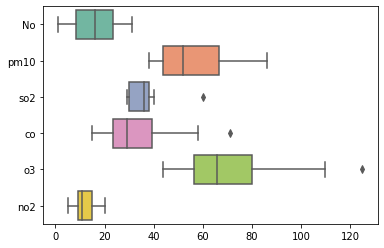

In [ ]:
ax=sns.boxplot(data=df,orient = "h",palette="Set2")

In [ ]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
std_atr=scale.fit_transform(df)
std_atr=pd.DataFrame(std_atr,columns=df.columns)
print(std_atr)

          No      pm10       so2        co        o3       no2
0  -1.677051 -1.332266  0.178651 -0.554937 -1.270676 -0.759786
1  -1.565248 -0.825958  0.178651  0.544802  1.631815 -1.015801
2  -1.453444 -0.391980  0.351719 -0.397832 -0.389562 -0.503771
3  -1.341641 -0.391980  0.524788 -1.026254  0.750702 -0.503771
4  -1.229837 -0.319651  0.697856 -0.554937 -0.441393 -0.759786
5  -1.118034  0.403646  0.351719  0.544802 -0.337732 -0.759786
6  -1.006231 -0.464310  0.524788  0.544802 -0.234072 -0.247756
7  -0.894427 -0.319651  0.870924 -0.790596 -0.026751 -0.247756
8  -0.782624  1.850240  0.524788  2.037305  0.025079  0.264273
9  -0.670820 -0.898288  0.351719 -0.397832 -1.218845 -0.759786
10 -0.559017 -0.898288  0.524788 -0.554937  0.491551 -0.759786
11 -0.447214 -0.970618  0.524788 -1.183360 -1.270676 -1.783845
12 -0.335410 -1.042947  0.524788 -1.340465 -1.011525 -1.015801
13 -0.223607 -1.187607 -0.513622 -1.183360 -1.167015 -0.759786
14 -0.111803 -0.898288 -1.032827 -1.261913 -0.389562 -0

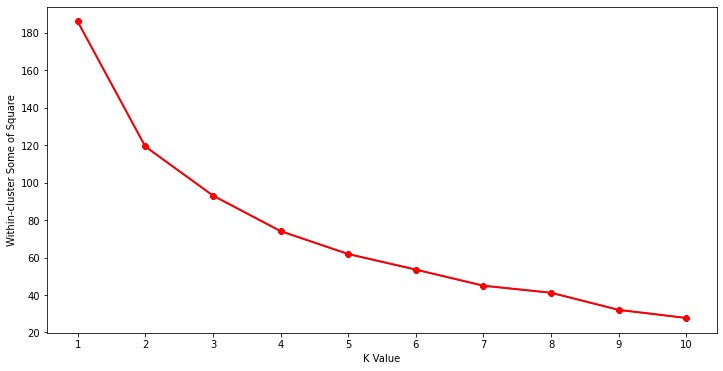

In [ ]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1,11):
  km=KMeans(n_clusters=i)
  km.fit(std_atr)
  wcss.append(km.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("Within-cluster Some of Square")
plt.show()

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f80daf0a0>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=2, random_state=42))

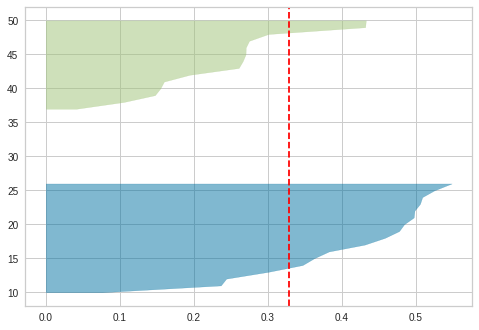

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
model=KMeans(2,random_state=42)
visualizer=SilhouetteVisualizer(model,colors='yellowbrick')
visualizer.fit(std_atr)

karena n=3 masih ada yg negatif, maka yg tepat adalah n=2

In [ ]:
from sklearn.metrics import silhouette_score
km=KMeans(n_clusters=2,random_state=42)
km.fit(std_atr)
score=silhouette_score(std_atr,km.labels_)
print('SilhouetterScore : %.3f' % score)

SilhouetterScore : 0.329


In [ ]:
from sklearn.metrics import silhouette_score
k_cluster = []
sil_coeffecients = []

for n_cluster in range(2,15):
  kmeans = KMeans(n_clusters=n_cluster).fit(std_atr)
  label = kmeans.labels_
  sil_coeff = silhouette_score(std_atr, label)
  print("For n_clusters={}, Silhouette coeffecient = {}".format(n_cluster , sil_coeff))
  sil_coeffecients.append(sil_coeff)
  k_cluster.append(n_cluster)

For n_clusters=2, Silhouette coeffecient = 0.32869169280546423
For n_clusters=3, Silhouette coeffecient = 0.2848328767327077
For n_clusters=4, Silhouette coeffecient = 0.22203770241814727
For n_clusters=5, Silhouette coeffecient = 0.22666473538986506
For n_clusters=6, Silhouette coeffecient = 0.23544974688864495
For n_clusters=7, Silhouette coeffecient = 0.23162574340668457
For n_clusters=8, Silhouette coeffecient = 0.24513645273925072
For n_clusters=9, Silhouette coeffecient = 0.22426411765230989
For n_clusters=10, Silhouette coeffecient = 0.24777079768160054
For n_clusters=11, Silhouette coeffecient = 0.23222536700680088
For n_clusters=12, Silhouette coeffecient = 0.23672100026217416
For n_clusters=13, Silhouette coeffecient = 0.21941053332402854
For n_clusters=14, Silhouette coeffecient = 0.24834554151596597


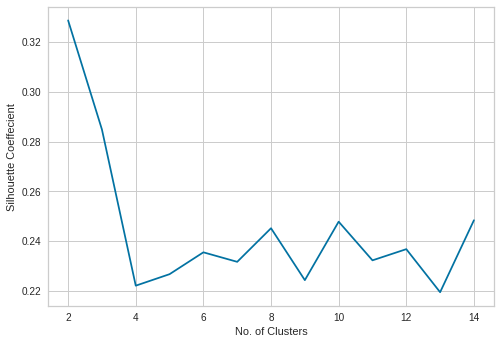

In [ ]:
plt.plot(k_cluster,sil_coeffecients)
plt.ylabel('Silhouette Coeffecient')
plt.xlabel('No. of Clusters')
plt.show()

In [ ]:
model=KMeans(init="random",n_clusters=2)
model.fit(std_atr)
print('inertia:',model.inertia_)
print('cluster_centroids:',model.cluster_centers_)

inertia: 119.27590579523718
cluster_centroids: [[ 0.85449741  0.59996974 -0.48889791  0.60091074  0.32495379  0.90431037]
 [-0.70370375 -0.49409272  0.40262181 -0.49486766 -0.26760901 -0.74472619]]


In [ ]:
clt=model.labels_
hasil=pd.Series(clt,name="Cluster")
hasil=pd.DataFrame(hasil)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
preprocessor=Pipeline([("scaler",StandardScaler()),("pca",PCA(n_components=2,random_state=42)),])
clusterer=Pipeline([("kmeans",KMeans(n_clusters=2,init="k-means++",n_init=50,max_iter=500,random_state=42,),),])
pipe=Pipeline([("preprocessor",preprocessor),("clusterer",clusterer)])
pipe.fit(df)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=2, n_init=50,
                                         random_state=42))]))])

In [ ]:
preprocessor_data=pipe["preprocessor"].transform(df)
predicted_labels=pipe["clusterer"]["kmeans"].labels_

In [ ]:
pcadf=pd.DataFrame(pipe["preprocessor"].transform(df),columns=["Dim 1","Dim 2"],)
pcadf["predicted_cluster"]=pipe["clusterer"]["kmeans"].labels_

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


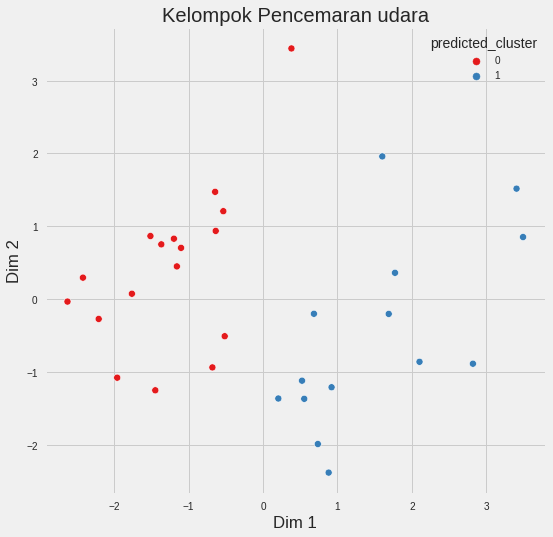

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8,8))
scat=sns.scatterplot("Dim 1","Dim 2", s=50,data=pcadf,hue="predicted_cluster", palette="Set1",)
scat.set_title("Kelompok Pencemaran udara")
plt.show()

In [ ]:
identified_clusters = kmeans.fit_predict(df)
identified_clusters

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int32)